[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [1]:
!pip install transformers datasets accelerate

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
from huggingface_hub import login
login('xxxx')


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Datasets library

In [2]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [4]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [5]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [6]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [7]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [8]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [9]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [10]:
type(imdb)

datasets.dataset_dict.DatasetDict

In [11]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [13]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"I'll admit I've only watched a handful of episodes, but each one seemed completely different from the next. It seems after the first season, the producers decided to completely retool the show, drop characters, introduce new ones, and rewrite the...",0
1284,"My thoughts on the movie, 9<br /><br />It was not good, not good at all. Visually, it was great. I was pleased with the pacing, the camera angles, etc. However, the characters? eh, kinda bland. Plot? It sucked.<br /><br />This movie seemed more n...",0
408,"This movie is excellent. I found it very interesting. I thought the Wendigo legend was pretty cool. The acting was also great, as well as the costumes, production, photography, directing and script. <br /><br />A very happy family, on vacation ge...",1
1282,"This is, without a doubt, the single worst movie ever created. There's no arguing here. This is it. End of story. The story is juvenile and sub-moronic, looking like it was created by a three-year-old fascinated with dinosaurs. The entire concept...",0
1447,"""Inspirational"" tales about ""triumph of the human spirit"" are usually big turn-offs for me. The most surprising thing about MEN OF HONOR is how much I enjoyed it in spite of myself. The movie is as predictable and cliched as it gets, but it works...",1
1144,The van trotta movie rosenstrasse is the best movie i have seen in years. i am actually not really interested in films with historical background but with this she won my interest for that time!!<br /><br />the only annoying thing about the movie...,1
1381,"We saw this at one of the local art movie theaters in the Montrose area of Houston, TX. It was a total surprise compared to the write-up in the theater's newsletter but we were both blown away by the artistry. It was beautifully done and (apparen...",1
181,"This (extremely)low-budget movie is compared to the great classic ""Silent Night Deadly Night"", since it is labeled as a Slasher Flick. First let me say that I think that even ""Silent Night Part 2"" is better than this (that one was filled with fla...",0
1183,"haha! you have to just smile and smile if you actually made it all the way through this movie. it like says something about myself i guess. the movie itself was created i think as some sort of psychological test, or like some sort of drug, to tak...",0
1103,"back in my high school days in Salina Kansas, they filmed something called ""The Brave Young Men Of Weinberg"" locally, and the film crews were rather prominent for weeks. eventually, we learned that the film was ""Up The Academy"", and was a bit umm...",1


In [14]:
df.loc[0, 'text']

"I was pleased to see that she had black hair! I've been a fan for about 30 years now and have been disgusted at the two earlier attempts to film the stories.<br /><br />I was pleased that the screenwriters updated the period to include a computer, it didn't spoil it at all. In fact I watched the film twice in one day, a sure sign that it was up to standard. This is what I do with books that I like as well.<br /><br />I thought all the characters were well depicted and represented the early days of Modesty Blaise extremely well as evinced in both book and comic strip. I would also have to disagree with a comment made by an earlier reviewer about baddies having to be ugly. Has he actually read the books?<br /><br />I thought this was a very good film and look forward to sequels with anticipation."

In [15]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

"I was pleased to see that she had black hair! I've been a fan for about 30 years now and have been disgusted at the two earlier attempts to film the stories.I was pleased that the screenwriters updated the period to include a computer, it didn't spoil it at all. In fact I watched the film twice in one day, a sure sign that it was up to standard. This is what I do with books that I like as well.I thought all the characters were well depicted and represented the early days of Modesty Blaise extremely well as evinced in both book and comic strip. I would also have to disagree with a comment made by an earlier reviewer about baddies having to be ugly. Has he actually read the books?I thought this was a very good film and look forward to sequels with anticipation."

In [16]:
df.label.value_counts()

,count
label,
0,809
1,791


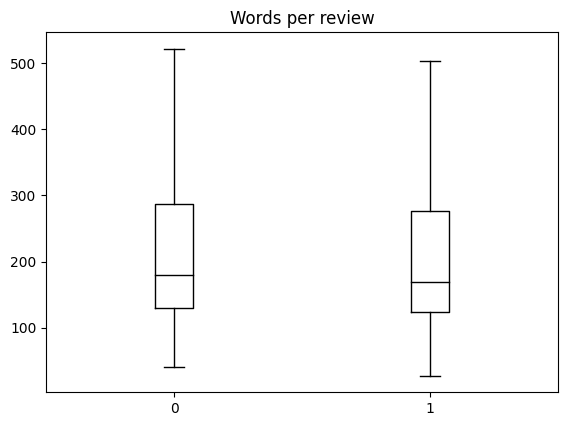

In [17]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [18]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
207,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
242,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38
355,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
422,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
665,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34
1131,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36
1306,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27


In [19]:
imdb.reset_format()

## Tokenizer

In [20]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [21]:
print(imdb_encoded['train'][0])

{'text': "I was pleased to see that she had black hair! I've been a fan for about 30 years now and have been disgusted at the two earlier attempts to film the stories.<br /><br />I was pleased that the screenwriters updated the period to include a computer, it didn't spoil it at all. In fact I watched the film twice in one day, a sure sign that it was up to standard. This is what I do with books that I like as well.<br /><br />I thought all the characters were well depicted and represented the early days of Modesty Blaise extremely well as evinced in both book and comic strip. I would also have to disagree with a comment made by an earlier reviewer about baddies having to be ugly. Has he actually read the books?<br /><br />I thought this was a very good film and look forward to sequels with anticipation.", 'label': 1, 'input_ids': [101, 146, 1108, 7229, 1106, 1267, 1115, 1131, 1125, 1602, 1716, 106, 146, 112, 1396, 1151, 170, 5442, 1111, 1164, 1476, 1201, 1208, 1105, 1138, 1151, 20524,

## Tiny IMDB

In [22]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForImageToImage',
 'AutoModelForInstanceSegmentation',
 'AutoModelForKeypointDetection',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTextEncoding',
 'AutoModelForTextToSpectrogram',
 'AutoModelForTextToWaveform',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentatio

In [23]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [25]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=epoch,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
f

In [26]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.709700,0.693682
2,0.684700,0.691784


In [27]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.07813132, -0.0218894 ],
       [-0.06051253, -0.04590895],
       [-0.0524372 , -0.03415285],
       [-0.03649085, -0.0549056 ],
       [-0.05482435, -0.01995463],
       [-0.02060993, -0.04347536],
       [-0.02315885, -0.02696504],
       [-0.05743931, -0.03777942],
       [-0.06113335, -0.03809236],
       [-0.04167246, -0.02477802]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.6978691220283508, 'test_runtime': 0.1773, 'test_samples_per_second': 56.405, 'test_steps_per_second': 11.281})

In [28]:
preds.predictions.shape

(10, 2)

In [29]:
preds.predictions.argmax(axis=-1)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [30]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.4

In [32]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [33]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  compute_metrics=get_accuracy,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.665700,0.686416,0.500000
2,0.637600,0.682733,0.500000


## Training run

In [49]:
batch_size = 8
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
# model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [50]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
# trainer = Trainer(model=model,
#                   args=training_args,
#                   compute_metrics=get_accuracy,
#                   train_dataset=tiny_imdb_encoded["train"],
#                   eval_dataset=tiny_imdb_encoded["validation"],
#                   tokenizer=tokenizer)


trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.442400,0.402107,0.835000
2,0.251600,0.336706,0.895000


In [51]:


trainer.evaluate()

{'eval_loss': 0.3367061913013458,
 'eval_accuracy': 0.895,
 'eval_runtime': 6.1469,
 'eval_samples_per_second': 65.073,
 'eval_steps_per_second': 8.134,
 'epoch': 2.0}

In [52]:
trainer.save_model()

In [53]:
model_name

'distilbert-base-cased-finetuned-imdb'

In [54]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
# classifier = pipeline('text-classification', model=model)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.5104947090148926}]

In [55]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.6042473912239075}]